In [1]:
import matplotlib.pyplot as plt  
import seaborn as sns  
import pandas as pd  
import numpy as np

# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
data=pd.read_csv('employee.csv')

In [3]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [4]:
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [6]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

# 2. Reset the index as "name" as the index. 

In [7]:
data.set_index(['name'],inplace=True)

In [9]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [10]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [11]:

data.loc[(data['department']=='Sales')|(data['department']=='Finance')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score

In [12]:
data.loc[(data['performance_score']>700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [13]:
data.loc[(data['performance_score']>500) & (data['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

In [14]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [15]:
data['age'].fillna(data['age'].median(),inplace=True)

In [16]:
data['income'].fillna(data['income'].mean(),inplace=True)

In [17]:
data['gender'].fillna(data['gender'].mode()[0],inplace=True)

In [18]:
data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

thus all null values are gone

# 8. Check the outliers and handle outliers in performance score using Percentiles.

Text(0.5, 1.0, 'Box plot of performance score')

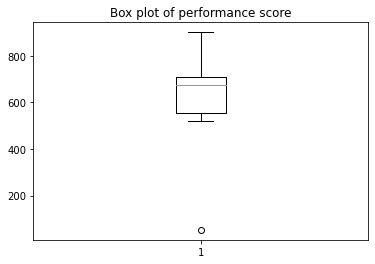

In [19]:
plt.boxplot(data['performance_score'])
plt.title('Box plot of performance score')

In [20]:
Q1=np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(data['performance_score'],75,interpolation='midpoint')

In [21]:
IQR=Q3-Q1

In [22]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [23]:
print(low_lim)
print(up_lim)

323.5
943.5


In [24]:
outlier=[]
for i in data['performance_score']:
    if (i<low_lim) or (i>up_lim):
        outlier.append(i)

In [25]:
outlier

[53]

In [26]:
ind=data['performance_score']<low_lim
data.loc[ind].index

Index(['James Authur'], dtype='object', name='name')

In [27]:
data.loc[['James Authur']]

,age,income,gender,department,grade,performance_score
name,,,,,,
James Authur,54.0,52857.142857,F,Operations,G3,53


<AxesSubplot:>

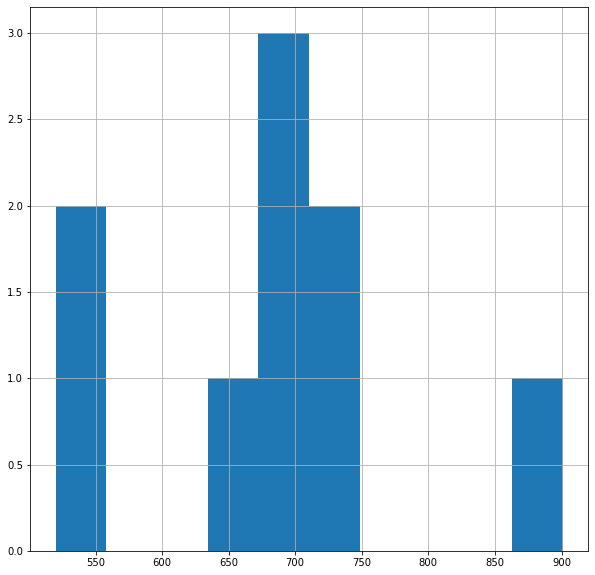

In [33]:
data['performance_score'].hist(figsize=(10,10))

In [34]:
data.loc[list(ind),'performance_score']=data['performance_score'].median()

In [35]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,F,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,F,Sales,G3,649
James Authur,54.0,52857.142857,F,Operations,G3,674
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


# 9. Check the gender column and do Dummy encoding.

In [36]:
data1=pd.get_dummies(data,columns=['gender'])

In [37]:
data1

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52857.142857,Operations,G3,723,1,0
S Kumar,45.0,16000.000000,Finance,G0,520,1,0
Jack Morgan,32.0,35000.000000,Finance,G2,674,0,1
Ying Chin,45.0,65000.000000,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.000000,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.000000,Sales,G3,649,1,0
James Authur,54.0,52857.142857,Operations,G3,674,1,0
Josh Wills,54.0,52000.000000,Finance,G3,901,1,0
Leo Duck,23.0,98000.000000,Sales,G4,709,0,1


# 10. Do the standard scaling on the feature performance score

In [38]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
x=standardisation.fit_transform(data[['performance_score']])
data[['performance_score']]=x
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,F,Operations,G3,0.422890
S Kumar,45.0,16000.000000,F,Finance,G0,-1.558187
Jack Morgan,32.0,35000.000000,M,Finance,G2,-0.055301
Ying Chin,45.0,65000.000000,F,Sales,G3,-1.206863
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,0.305782
Satyam Sharma,45.0,62000.000000,F,Sales,G3,-0.299276
James Authur,54.0,52857.142857,F,Operations,G3,-0.055301
Josh Wills,54.0,52000.000000,F,Finance,G3,2.159992
Leo Duck,23.0,98000.000000,M,Sales,G4,0.286264
